In [76]:
#Load required libraries
library(dplyr)
library(tidyr)
library(countrycode)
library(purrr)
library(broom)

In [1]:
votes = readRDS("votes.rds")

In [2]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# 1. Data cleaning and summarizing with dplyr

Filtering rows
100xp
The vote column in the dataset has a number that represents that country's vote:

1 = Yes
2 = Abstain
3 = No
8 = Not present
9 = Not a member
One step of data cleaning is removing observations (rows) that you're not interested in. In this case, you want to remove "Not present" and "Not a member".

Instructions
Load the dplyr package.
Print the votes table.
Filter out rows where the vote recorded is "not present" or "not a member", leaving cases where it is "yes", "abstain", or "no".

In [3]:
# Load the dplyr package
library(dplyr)

# Print the votes dataset
votes

# Filter for votes that are "yes", "abstain", or "no"
votes %>% filter(vote<=3)

rcid session vote ccode
1      46   2       1      2  
2      46   2       1     20  
3      46   2       9     31  
4      46   2       1     40  
5      46   2       1     41  
6      46   2       1     42  
7      46   2       9     51  
8      46   2       9     52  
9      46   2       9     53  
10     46   2       9     54  
11     46   2       9     55  
12     46   2       9     56  
13     46   2       9     57  
14     46   2       9     58  
15     46   2       9     60  
16     46   2       1     70  
17     46   2       9     80  
18     46   2       1     90  
19     46   2       1     91  
20     46   2       1     92  
21     46   2       1     93  
22     46   2       1     94  
23     46   2       1     95  
24     46   2       1    100  
25     46   2       1    101  
26     46   2       9    110  
27     46   2       9    115  
28     46   2       1    130  
29     46   2       1    135  
30     46   2       1    140  
...    ...  ...     ...  ...  
508900 9056 22      3    770  
508901 9056 22      9    771  
508902 9056 22      8    775  
508903 9056 22      2    780  
508904 9056 22      8    781  
508905 9056 22      1    790  
508906 9056 22      1    800  
508907 9056 22      8    811  
508908 9056 22      1    812  
508909 9056 22      9    816  
508910 9056 22      3    820  
508911 9056 22      1    830  
508912 9056 22      9    835  
508913 9056 22      1    840  
508914 9056 22      2    850  
508915 9056 22      9    860  
508916 9056 22      1    900  
508917 9056 22      9    910  
508918 9056 22      1    920  
508919 9056 22      9    935  
508920 9056 22      9    940  
508921 9056 22      9    946  
508922 9056 22      9    947  
508923 9056 22      9    950  
508924 9056 22      9    955  
508925 9056 22      9    970  
508926 9056 22      9    983  
508927 9056 22      9    986  
508928 9056 22      9    987  
508929 9056 22      9    990

rcid session vote ccode
1      46   2       1      2  
2      46   2       1     20  
3      46   2       1     40  
4      46   2       1     41  
5      46   2       1     42  
6      46   2       1     70  
7      46   2       1     90  
8      46   2       1     91  
9      46   2       1     92  
10     46   2       1     93  
11     46   2       1     94  
12     46   2       1     95  
13     46   2       1    100  
14     46   2       1    101  
15     46   2       1    130  
16     46   2       1    135  
17     46   2       1    140  
18     46   2       1    150  
19     46   2       1    155  
20     46   2       1    160  
21     46   2       1    165  
22     46   2       1    200  
23     46   2       1    210  
24     46   2       1    211  
25     46   2       1    212  
26     46   2       1    220  
27     46   2       3    290  
28     46   2       3    315  
29     46   2       3    345  
30     46   2       1    350  
...    ...  ...     ...  ...  
353518 9056 22      3    616  
353519 9056 22      3    620  
353520 9056 22      3    625  
353521 9056 22      2    630  
353522 9056 22      2    640  
353523 9056 22      3    645  
353524 9056 22      3    651  
353525 9056 22      3    652  
353526 9056 22      3    660  
353527 9056 22      3    663  
353528 9056 22      2    666  
353529 9056 22      3    670  
353530 9056 22      3    678  
353531 9056 22      3    690  
353532 9056 22      3    700  
353533 9056 22      1    712  
353534 9056 22      1    713  
353535 9056 22      1    740  
353536 9056 22      1    750  
353537 9056 22      3    770  
353538 9056 22      2    780  
353539 9056 22      1    790  
353540 9056 22      1    800  
353541 9056 22      1    812  
353542 9056 22      3    820  
353543 9056 22      1    830  
353544 9056 22      1    840  
353545 9056 22      2    850  
353546 9056 22      1    900  
353547 9056 22      1    920

In [ ]:
Adding a year column
100xp
The next step of data cleaning is manipulating your variables (columns) to make them more informative.

In this case, you have a session column that is hard to interpret intuitively. But since the UN started voting in 1946, and holds one session per year, you can get the year of a UN resolution by adding 1945 to the session number.

Instructions
Use mutate() to add a year column by adding 1945 to the session column.

In [ ]:
# Add another %>% step to add a year column
votes %>%
  filter(vote <= 3) %>%
  mutate(year=session+1945)

Adding a country column
100xp
The country codes in the ccode column are what's called Correlates of War codes. This isn't ideal for an analysis, since you'd like to work with recognizable country names.

You can use the countrycode package to translate. For example:

library(countrycode)

`# Translate the country code 2`
`> countrycode(2, "cown", "country.name")`
`[1] "United States"`

`# Translate multiple country codes`
`> countrycode(c(2, 20, 40), "cown", "country.name")`
`[1] "United States" "Canada"        "Cuba"
Instructions
Load the countrycode package.
Convert the country code 100 to its country name.
Add a new country column in your mutate() statement containing country names, using the countrycode() function to translate from the ccode column. Save the result to votes_processed.`

In [4]:
#install.packages('countrycode', repos='http://cran.us.r-project.org')
library(countrycode)

Warning message:
"package 'countrycode' was built under R version 3.3.3"

In [5]:
# Load the countrycode package
library(countrycode)

# Convert country code 100
countrycode(100, "cown", "country.name")

# Add a country column within the mutate: votes_processed
votes_processed <- votes %>%
  filter(vote <= 3) %>%
  mutate(year = session + 1945, country=countrycode(ccode, "cown", "country.name"))

[1] "Colombia"

## Grouping and summarizing - Video

Summarizing the full dataset
100xp
In this analysis, you're going to focus on "% of votes that are yes" as a metric for the "agreeableness" of countries.

You'll start by finding this summary for the entire dataset: the fraction of all votes in their history that were "yes". Note that within your call to summarize(), you can use n() to find the total number of votes and mean(vote == 1) to find the fraction of "yes" votes.

Instructions
Print the votes_processed dataset that you created in the previous exercise.
Summarize the dataset using the summarize() function to create two columns:
total: with the number of votes
percent_yes: the percentage of "yes" votes

In [ ]:
# Print votes_processed
votes_processed

# Find total and fraction of "yes" votes
votes_processed %>% summarize(total=n(), percent_yes=mean(vote==1))

### Summarizing by year
100xp
The summarize() function is especially useful because it can be used within groups.

For example, you might like to know how much the average "agreeableness" of countries changed from year to year. To examine this, you can use group_by() to perform your summary not for the entire dataset, but within each year.

Instructions
Add a group_by() to your code to summarize() within each year.

In [ ]:
# Change this code to summarize by year
votes_processed %>%
  group_by(year) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

 The group_by() function must go before your call to summarize() when you're trying to perform your summary within groups.

### Summarizing by country
100xp
In the last exercise, you performed a summary of the votes within each year. You could instead summarize() within each country, which would let you compare voting patterns between countries.

Instructions
Change the code in the editor to summarize() within each country rather than within each year. Save the result as by_country.

In [6]:
# Summarize by country: by_country
by_country = votes_processed %>%
  group_by(country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

## Sorting and filtering summarized data - Video

### Sorting by percentage of "yes" votes
100xp
Now that you've summarized the dataset by country, you can start examining it and answering interesting questions.

For example, you might be especially interested in the countries that voted "yes" least often, or the ones that voted "yes" most often.

Instructions
Print the by_country dataset created in the last exercise.
Use arrange() to sort the countries in ascending order of percent_yes.
Arrange the countries by the same variable, but in descending order.

In [7]:
# You have the votes summarized by country
by_country <- votes_processed %>%
  group_by(country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

# Print the by_country dataset
by_country

# Sort in ascending order of percent_yes
by_country %>% arrange(percent_yes)

# Now sort in descending order
by_country %>% arrange(desc(percent_yes))

country                                              total percent_yes
1   Afghanistan                                          2373  0.8592499  
2   Albania                                              1695  0.7174041  
3   Algeria                                              2213  0.8992318  
4   Andorra                                               719  0.6383866  
5   Angola                                               1431  0.9238295  
6   Antigua and Barbuda                                  1302  0.9124424  
7   Argentina                                            2553  0.7677242  
8   Armenia                                               758  0.7467018  
9   Australia                                            2575  0.5565049  
10  Austria                                              2389  0.6224362  
11  Azerbaijan                                            704  0.8622159  
12  Bahamas                                              1781  0.8944413  
13  Bahrain                                              2010  0.9348259  
14  Bangladesh                                           1799  0.9444136  
15  Barbados                                             2001  0.9055472  
16  Belarus                                              2534  0.7600631  
17  Belgium                                              2568  0.4922118  
18  Belize                                               1111  0.9270927  
19  Benin                                                2169  0.9059474  
20  Bhutan                                               1839  0.9178902  
21  Bolivia (Plurinational State of)                     2396  0.8555927  
22  Bosnia and Herzegovina                                556  0.6762590  
23  Botswana                                             1903  0.9238045  
24  Brazil                                               2560  0.8144531  
25  Brunei Darussalam                                    1247  0.9286287  
26  Bulgaria                                             2377  0.6979386  
27  Burkina Faso                                         2156  0.9086271  
28  Burundi                                              1935  0.9235142  
29  Cabo Verde                                           1632  0.9332108  
30  Cambodia                                             1785  0.8941176  
... ...                                                  ...   ...        
171 Taiwan, Province of China                             534  0.5880150  
172 Tajikistan                                            543  0.8360958  
173 Thailand                                             2534  0.8547751  
174 The former Yugoslav Republic of Macedonia             761  0.6294350  
175 Timor-Leste                                           326  0.9570552  
176 Togo                                                 2260  0.9030973  
177 Tonga                                                 381  0.7427822  
178 Trinidad and Tobago                                  2116  0.9229679  
179 Tunisia                                              2356  0.9104414  
180 Turkey                                               2532  0.6986572  
181 Turkmenistan                                          462  0.9047619  
182 Tuvalu                                                272  0.8198529  
183 Uganda                                               2045  0.8982885  
184 Ukraine                                              2570  0.7284047  
185 United Arab Emirates                                 1934  0.9467425  
186 United Kingdom of Great Britain and Northern Ireland 2558  0.4167318  
187 United Republic of Tanzania                          2159  0.9152385  
188 United States of America                             2568  0.2694704  
189 Uruguay                                              2493  0.8150822  
190 Uzbekistan                                            452  0.7566372  
191 Vanuatu                                              1018  0.9047151  
192 Venezuela, Bolivarian Rep

country                                              total percent_yes
1   Zanzibar                                                2  0.0000000  
2   United States of America                             2568  0.2694704  
3   Palau                                                 369  0.3387534  
4   Israel                                               2380  0.3407563  
5   Federal Republic of Germany                          1075  0.3972093  
6   United Kingdom of Great Britain and Northern Ireland 2558  0.4167318  
7   France                                               2527  0.4265928  
8   Micronesia (Federated States of)                      724  0.4419890  
9   Marshall Islands                                      757  0.4914135  
10  Belgium                                              2568  0.4922118  
11  Canada                                               2576  0.5081522  
12  Luxembourg                                           2541  0.5120031  
13  Italy                                                2382  0.5146935  
14  Netherlands                                          2576  0.5221273  
15  Portugal                                             2337  0.5241763  
16  Australia                                            2575  0.5565049  
17  Georgia                                               713  0.5694250  
18  Denmark                                              2576  0.5733696  
19  Nauru                                                 251  0.5816733  
20  Norway                                               2570  0.5821012  
21  Japan                                                2384  0.5876678  
22  Taiwan, Province of China                             534  0.5880150  
23  Latvia                                                809  0.5945612  
24  Iceland                                              2487  0.6003217  
25  Germany                                               846  0.6016548  
26  New Zealand                                          2569  0.6076294  
27  Lithuania                                             836  0.6124402  
28  Estonia                                               816  0.6151961  
29  Republic of Moldova                                   745  0.6161074  
30  Sweden                                               2576  0.6164596  
... ...                                                  ...   ...        
171 Eritrea                                               638  0.9200627  
172 Trinidad and Tobago                                  2116  0.9229679  
173 Burundi                                              1935  0.9235142  
174 Botswana                                             1903  0.9238045  
175 Angola                                               1431  0.9238295  
176 Namibia                                               792  0.9255051  
177 Belize                                               1111  0.9270927  
178 Zambia                                               2123  0.9274611  
179 Gambia (Islamic Republic of the)                     1404  0.9280627  
180 Brunei Darussalam                                    1247  0.9286287  
181 Guyana                                               2071  0.9314341  
182 Kuwait                                               2152  0.9316914  
183 Cabo Verde                                           1632  0.9332108  
184 Oman                                                 1948  0.9332649  
185 Bahrain                                              2010  0.9348259  
186 Qatar                                                2001  0.9370315  
187 Suriname                                             1635  0.9376147  
188 Maldives                                             1847  0.9415268  
189 Bangladesh                                           1799  0.9444136  
190 Yemen                                                 784  0.9464286  
191 Mozambique                                           1701  0.9465021  
192 United Arab Emirates     

country                                              total percent_yes
1   Sao Tome and Principe                                1091  0.9761687  
2   Seychelles                                            881  0.9750284  
3   Djibouti                                             1598  0.9612015  
4   Guinea Bissau                                        1538  0.9603381  
5   Timor-Leste                                           326  0.9570552  
6   Mauritius                                            1831  0.9497542  
7   Zimbabwe                                             1361  0.9493020  
8   Comoros                                              1133  0.9470432  
9   United Arab Emirates                                 1934  0.9467425  
10  Mozambique                                           1701  0.9465021  
11  Yemen                                                 784  0.9464286  
12  Bangladesh                                           1799  0.9444136  
13  Maldives                                             1847  0.9415268  
14  Suriname                                             1635  0.9376147  
15  Qatar                                                2001  0.9370315  
16  Bahrain                                              2010  0.9348259  
17  Oman                                                 1948  0.9332649  
18  Cabo Verde                                           1632  0.9332108  
19  Kuwait                                               2152  0.9316914  
20  Guyana                                               2071  0.9314341  
21  Brunei Darussalam                                    1247  0.9286287  
22  Gambia (Islamic Republic of the)                     1404  0.9280627  
23  Zambia                                               2123  0.9274611  
24  Belize                                               1111  0.9270927  
25  Namibia                                               792  0.9255051  
26  Angola                                               1431  0.9238295  
27  Botswana                                             1903  0.9238045  
28  Burundi                                              1935  0.9235142  
29  Trinidad and Tobago                                  2116  0.9229679  
30  Eritrea                                               638  0.9200627  
... ...                                                  ...   ...        
171 Sweden                                               2576  0.6164596  
172 Republic of Moldova                                   745  0.6161074  
173 Estonia                                               816  0.6151961  
174 Lithuania                                             836  0.6124402  
175 New Zealand                                          2569  0.6076294  
176 Germany                                               846  0.6016548  
177 Iceland                                              2487  0.6003217  
178 Latvia                                                809  0.5945612  
179 Taiwan, Province of China                             534  0.5880150  
180 Japan                                                2384  0.5876678  
181 Norway                                               2570  0.5821012  
182 Nauru                                                 251  0.5816733  
183 Denmark                                              2576  0.5733696  
184 Georgia                                               713  0.5694250  
185 Australia                                            2575  0.5565049  
186 Portugal                                             2337  0.5241763  
187 Netherlands                                          2576  0.5221273  
188 Italy                                                2382  0.5146935  
189 Luxembourg                                           2541  0.5120031  
190 Canada                                               2576  0.5081522  
191 Belgium                                              2568  0.4922118  
192 Marshall Islands         

### Filtering summarized output
100xp
In the last exercise, you may have noticed that the country that voted least frequently, Zanzibar, had only 2 votes in the entire dataset. You certainly can't make any substantial conclusions based on that data!

Typically in a progressive analysis, when you find that a few of your observations have very little data while others have plenty, you set some threshold to filter them out.

Instructions
Use filter() to remove from the sorted data countries that have fewer than 100 votes.

In [ ]:
# Filter out countries with fewer than 100 votes
by_country %>%
  arrange(percent_yes) %>% 
  filter(total > 100)

# 2. Data visualization with ggplot2

## Visualization with ggplot2 - Video

Choosing an aesthetic
50xp
You're going to create a line graph to show the trend over time of how many votes are "yes".

Which of the following aesthetics should you map the year variable to?

Possible Answers
Click or Press Ctrl+1 to focus
Color
Width
X-axis (Correct)
Y-axis
Take Hint (-15xp)

### Plotting a line over time
100xp
In the last chapter, you learned how to summarize() the votes dataset by year, particularly the percentage of votes in each year that were "yes".

You'll now use the ggplot2 package to turn your results into a visualization of the percentage of "yes" votes over time.

Instructions
The by_year dataset has the number of votes and percentage of "yes" votes each year.

Load the ggplot2 package.
Use ggplot() with the geom_line layer to create a line plot with year on the x-axis and percent_yes on the y-axis.

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

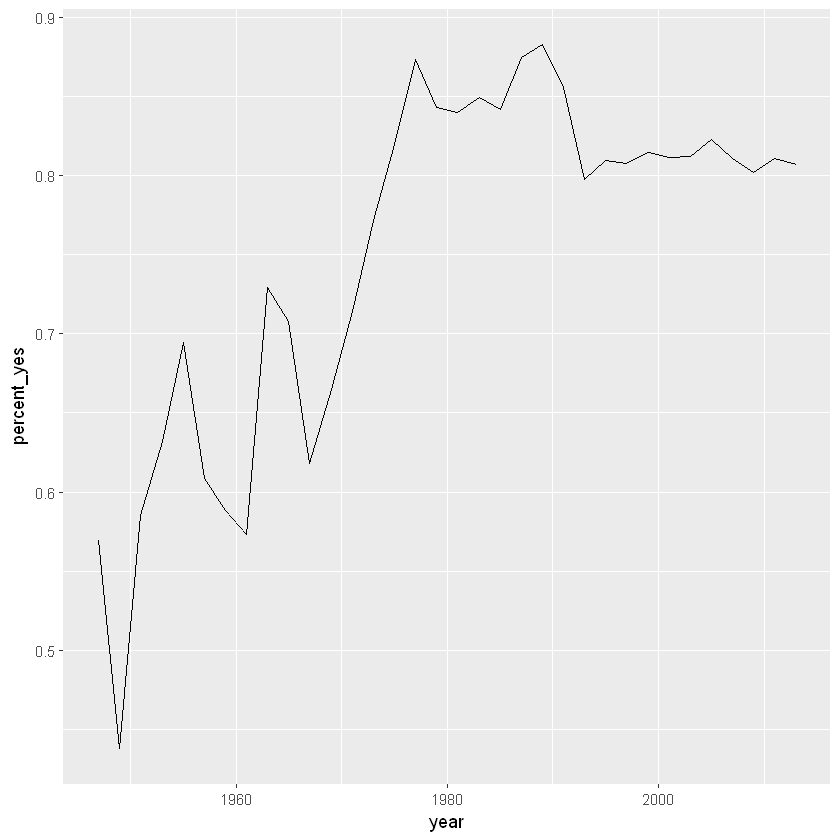

In [8]:
# Define by_year
by_year <- votes_processed %>%
  group_by(year) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

# Load the ggplot2 package
library(ggplot2)

# Create line plot
ggplot(by_year, aes(x=year, y=percent_yes)) +
  geom_line()

In [9]:
dim(votes_processed)

[1] 353547      6

### Other ggplot2 layers
100xp
A line plot is one way to display this data. You could also choose to display it as a scatter plot, with each year represented as a single point. This requires changing the layer (i.e. geom_line() to geom_point()).

You can also add additional layers to your graph, such as a smoothing curve with geom_smooth().

Instructions
Change the plot to a scatter plot and add a smoothing curve.

`geom_smooth()` using method = 'loess'


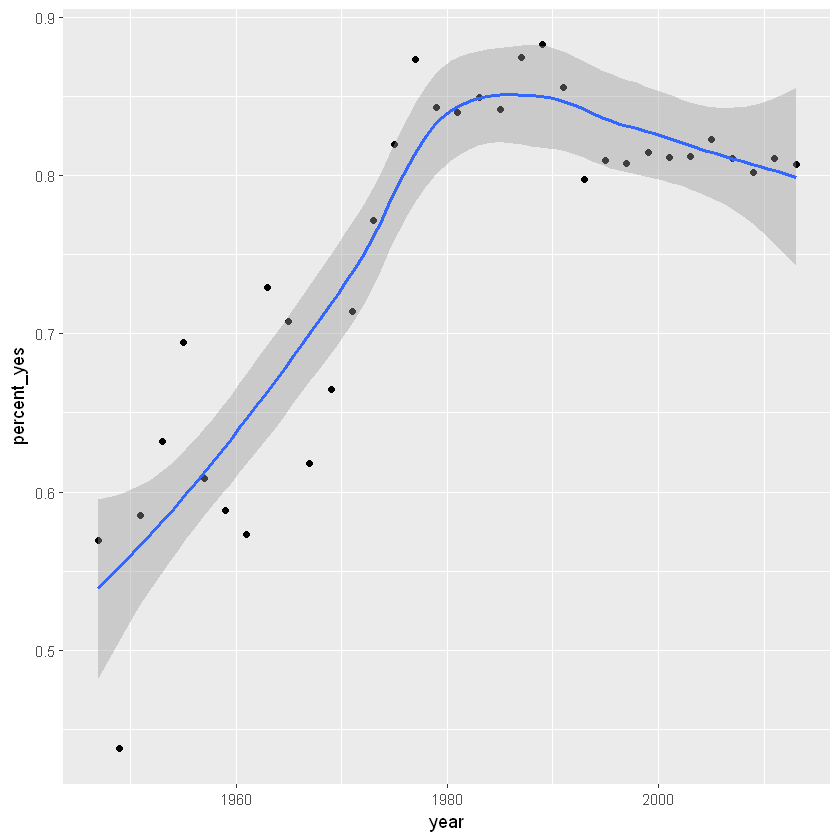

In [9]:
# Change to scatter plot and add smoothing curve
ggplot(by_year, aes(year, percent_yes)) +
  geom_point() + geom_smooth()


## Visualizing by country - Video

### Summarizing by year and country
100xp
You're more interested in trends of voting within specific countries than you are in the overall trend. So instead of summarizing just by year, summarize by both year and country, constructing a dataset that shows what fraction of the time each country votes "yes" in each year.

Instructions
Change the code in the editor to group by both year and country rather than just by year. Save the result as by_year_country.

In [10]:
# Group by year and country: by_year_country
by_year_country = votes_processed %>%
  group_by(year, country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

In [11]:
#Below steps are added because the data is not matching with the Datacamp data for "votes_processed"

In [12]:
dim(by_year_country)

[1] 4744    4

In [13]:
old = as.character(unique(votes_processed$country))

In [14]:
class(new)

[1] "function"

In [15]:
#From Datacamp Console
new = c("United States", "Canada", "Cuba", "Haiti", "Dominican Republic", 
"Mexico", "Guatemala", "Honduras", "El Salvador", "Nicaragua", 
"Costa Rica", "Panama", "Colombia", "Venezuela, Bolivarian Republic of", 
"Ecuador", "Peru", "Brazil", "Paraguay", "Chile", "Argentina", 
"Uruguay", "United Kingdom", "Netherlands", "Belgium", "Luxembourg", 
"France", "Poland", "Czechoslovakia", "Yugoslavia", "Greece", 
"Russian Federation", "Ukraine", "Belarus", "Sweden", "Norway", 
"Denmark", "Iceland", "Liberia", "Ethiopia", "South Africa", 
"Iran, Islamic Republic of", "Turkey", "Iraq", "Egypt", "Syrian Arab Republic", 
"Lebanon", "Saudi Arabia", "Afghanistan", "Taiwan, Province of China", 
"India", "Thailand", "Philippines", "Australia", "New Zealand", 
"Bolivia, Plurinational State of", "Yemen Arab Republic", "Pakistan", 
"Israel", "Myanmar", "Indonesia", "Hungary", "Jordan", "Sri Lanka", 
"Spain", "Romania", "Ireland", "Portugal", "Austria", "Italy", 
"Albania", "Bulgaria", "Finland", "Ghana", "Morocco", "Tunisia", 
"Libya", "Sudan", "Japan", "Nepal", "Cambodia", "Lao People's Democratic Republic", 
"Malaysia", "Guinea", "Cyprus", "Mali", "Senegal", "Niger", "Cote d'Ivoire", 
"Burkina Faso", "Togo", "Cameroon", "Nigeria", "Gabon", "Central African Republic", 
"Chad", "Congo", "Congo, the Democratic Republic of the", "Somalia", 
"Madagascar", "Benin", "Sierra Leone", "Mongolia", "Mauritania", 
"Tanzania, United Republic of", "Jamaica", "Trinidad and Tobago", 
"Uganda", "Burundi", "Rwanda", "Algeria", "Kuwait", "Kenya", 
"Zanzibar", "Zambia", "Malawi", "Maldives", "Singapore", "Malta", 
"Gambia", "Lesotho", "Guyana", "Botswana", "Barbados", "Yemen People's Republic", 
"Mauritius", "Equatorial Guinea", "Swaziland", "Bhutan", "Fiji", 
"Bahrain", "Qatar", "Oman", "China", "United Arab Emirates", 
"Federal Republic of Germany", "German Democratic Republic", 
"Bahamas", "Grenada", "Cabo Verde", "Sao Tome and Principe", 
"Guinea-Bissau", "Mozambique", "Bangladesh", "Comoros", "Papua New Guinea", 
"Suriname", "Djibouti", "Angola", "Viet Nam", "Samoa", "Seychelles", 
"Solomon Islands", "Saint Lucia", "Saint Vincent and the Grenadines", 
"Zimbabwe", "Vanuatu", "Belize", "Antigua and Barbuda", "Dominica", 
"Saint Kitts and Nevis", "Brunei Darussalam", "Liechtenstein", 
"Germany", "Estonia", "Latvia", "Lithuania", "Namibia", "Yemen", 
"Korea, Democratic People's Republic of", "Korea, Republic of", 
"Micronesia, Federated States of", "Marshall Islands", "San Marino", 
"Bosnia and Herzegovina", "Armenia", "Azerbaijan", "Monaco", 
"Andorra", "Czech Republic", "Slovakia", "Macedonia, the former Yugoslav Republic of", 
"Croatia", "Slovenia", "Moldova, Republic of", "Kyrgyzstan", 
"Kazakhstan", "Eritrea", "Turkmenistan", "Georgia", "Tajikistan", 
"Uzbekistan", "Palau", "Tonga", "Tuvalu", "Nauru", "Kiribati", 
"Switzerland", "Timor-Leste", "Montenegro", "South Sudan")

In [16]:
countries = data_frame(old=old, new=as.character(new))

In [17]:
str(countries)

Classes 'tbl_df', 'tbl' and 'data.frame':	200 obs. of  2 variables:
 $ old: chr  "United States of America" "Canada" "Cuba" "Haiti" ...
 $ new: chr  "United States" "Canada" "Cuba" "Haiti" ...


In [18]:
countries$difference = countries$old==countries$new

In [19]:
table(countries$difference)


FALSE  TRUE 
   14   186 

In [20]:
filter(countries, difference==FALSE)

old                                                 
1  United States of America                            
2  United Kingdom of Great Britain and Northern Ireland
3  Iran (Islamic Republic of)                          
4  Bolivia (Plurinational State of)                    
5  Côte D'Ivoire                                       
6  Democratic Republic of the Congo                    
7  United Republic of Tanzania                         
8  Gambia (Islamic Republic of the)                    
9  Guinea Bissau                                       
10 Democratic People's Republic of Korea               
11 Republic of Korea                                   
12 Micronesia (Federated States of)                    
13 The former Yugoslav Republic of Macedonia           
14 Republic of Moldova                                 
   new                                        difference
1  United States                              FALSE     
2  United Kingdom                             FALSE     
3  Iran, Islamic Republic of                  FALSE     
4  Bolivia, Plurinational State of            FALSE     
5  Cote d'Ivoire                              FALSE     
6  Congo, the Democratic Republic of the      FALSE     
7  Tanzania, United Republic of               FALSE     
8  Gambia                                     FALSE     
9  Guinea-Bissau                              FALSE     
10 Korea, Democratic People's Republic of     FALSE     
11 Korea, Republic of                         FALSE     
12 Micronesia, Federated States of            FALSE     
13 Macedonia, the former Yugoslav Republic of FALSE     
14 Moldova, Republic of                       FALSE

In [21]:
vp = left_join(votes_processed, countries, by =c("country"="old"))
#vp = merge(votes+)

vp = rename(vp, old=country, country=new)
votes_processed = vp
head(vp)

rcid session vote ccode year old                      country           
1 46   2       1     2    1947 United States of America United States     
2 46   2       1    20    1947 Canada                   Canada            
3 46   2       1    40    1947 Cuba                     Cuba              
4 46   2       1    41    1947 Haiti                    Haiti             
5 46   2       1    42    1947 Dominican Republic       Dominican Republic
6 46   2       1    70    1947 Mexico                   Mexico            
  difference
1 FALSE     
2  TRUE     
3  TRUE     
4  TRUE     
5  TRUE     
6  TRUE

In [22]:
head(filter(votes_processed, country=="United Kingdom"))

rcid session vote ccode year
1 46   2       1    200   1947
2 47   2       1    200   1947
3 48   2       1    200   1947
4 49   2       3    200   1947
5 50   2       3    200   1947
6 51   2       3    200   1947
  old                                                  country       
1 United Kingdom of Great Britain and Northern Ireland United Kingdom
2 United Kingdom of Great Britain and Northern Ireland United Kingdom
3 United Kingdom of Great Britain and Northern Ireland United Kingdom
4 United Kingdom of Great Britain and Northern Ireland United Kingdom
5 United Kingdom of Great Britain and Northern Ireland United Kingdom
6 United Kingdom of Great Britain and Northern Ireland United Kingdom
  difference
1 FALSE     
2 FALSE     
3 FALSE     
4 FALSE     
5 FALSE     
6 FALSE

### Plotting just the UK over time
100xp
Now that you have the percentage of time that each country voted "yes" within each year, you can plot the trend for a particular country. In this case, you'll look at the trend for just the United Kingdom.

This will involve using filter() on your data before giving it to ggplot2.

Instructions
Print the by_year_country dataset.
Create a filtered version of the dataset called UK_by_year.
Create a line plot of the percentage of "yes" votes over time for the United Kingdom.

year country                           total percent_yes
1    1947 Afghanistan                       34    0.3823529  
2    1947 Argentina                         38    0.5789474  
3    1947 Australia                         38    0.5526316  
4    1947 Belarus                           38    0.5000000  
5    1947 Belgium                           38    0.6052632  
6    1947 Bolivia, Plurinational State of   37    0.5945946  
7    1947 Brazil                            38    0.6578947  
8    1947 Canada                            38    0.6052632  
9    1947 Chile                             38    0.6578947  
10   1947 Colombia                          35    0.5428571  
11   1947 Costa Rica                        33    0.6969697  
12   1947 Cuba                              38    0.6578947  
13   1947 Czechoslovakia                    38    0.4736842  
14   1947 Denmark                           38    0.6315789  
15   1947 Dominican Republic                38    0.6052632  
16   1947 Ecuador                           35    0.6000000  
17   1947 Egypt                             38    0.5000000  
18   1947 El Salvador                       35    0.6000000  
19   1947 Ethiopia                          38    0.4473684  
20   1947 France                            38    0.7368421  
21   1947 Greece                            37    0.4324324  
22   1947 Guatemala                         38    0.6052632  
23   1947 Haiti                             35    0.6571429  
24   1947 Honduras                          34    0.5882353  
25   1947 Iceland                           33    0.7272727  
26   1947 India                             37    0.4054054  
27   1947 Iran, Islamic Republic of         37    0.6216216  
28   1947 Iraq                              38    0.4473684  
29   1947 Lebanon                           38    0.4473684  
30   1947 Liberia                           37    0.7027027  
...  ...  ...                               ...   ...        
4715 2013 Suriname                          61    0.9344262  
4716 2013 Swaziland                         60    0.9500000  
4717 2013 Sweden                            64    0.5937500  
4718 2013 Switzerland                       64    0.6406250  
4719 2013 Syrian Arab Republic              63    0.7777778  
4720 2013 Tajikistan                        58    0.9310345  
4721 2013 Tanzania, United Republic of      63    0.9523810  
4722 2013 Thailand                          64    0.9375000  
4723 2013 Timor-Leste                       56    0.9642857  
4724 2013 Togo                              64    0.8437500  
4725 2013 Tonga                             53    0.7169811  
4726 2013 Trinidad and Tobago               64    0.9687500  
4727 2013 Tunisia                           63    0.9365079  
4728 2013 Turkey                            62    0.6774194  
4729 2013 Turkmenistan                      55    0.9636364  
4730 2013 Tuvalu                            54    0.9629630  
4731 2013 Uganda                            63    0.8888889  
4732 2013 Ukraine                           64    0.6093750  
4733 2013 United Arab Emirates              63    0.9365079  
4734 2013 United Kingdom                    64    0.5000000  
4735 2013 United States                     64    0.2031250  
4736 2013 Uruguay                           64    0.9218750  
4737 2013 Uzbekistan                        61    0.8196721  
4738 2013 Vanuatu                           30    0.6666667  
4739 2013 Venezuela, Bolivarian Republic of 63    0.9047619  
4740 2013 Viet Nam                          62    0.9193548  
4741 2013 Yemen                             60    0.9166667  
4742 2013 Yugoslavia                        63    0.6190476  
4743 2013 Zambia                            62    0.9193548  
4744 2013 Zimbabwe                          60    0.8833333

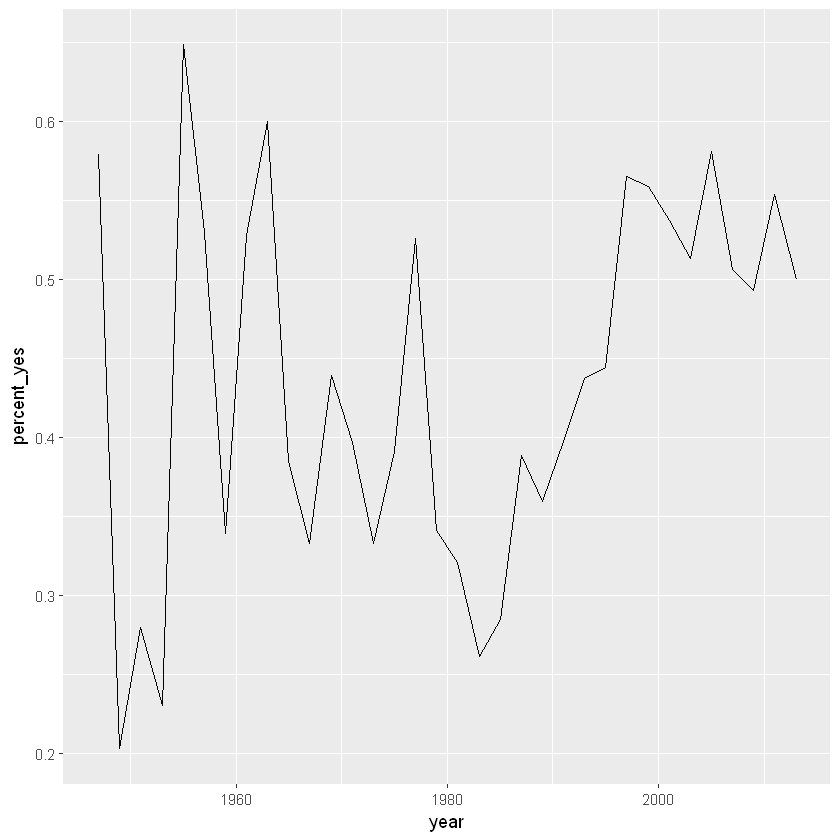

In [23]:
# Start with by_year_country dataset
by_year_country <- votes_processed %>%
  group_by(year, country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

# Print by_year_country
by_year_country

# Create a filtered version: UK_by_year
#UK_by_year = by_year_country %>% filter(country=="United Kingdom of Great Britain and Northern Ireland")

UK_by_year = by_year_country %>% filter(country=="United Kingdom")

# Line plot of percent_yes over time for UK only
ggplot(UK_by_year, aes(year, percent_yes)) + 

geom_line()

In [52]:
by_year_country = ungroup(by_year_country)

### Plotting multiple countries

Plotting just one country at a time is interesting, but you really want to compare trends between countries. For example, suppose you want to compare voting trends for the United States, the UK, France, and India.

You'll have to filter to include all four of these countries and use another aesthetic (not just x- and y-axes) to distinguish the countries on the resulting visualization. Instead, you'll use the color aesthetic to represent different countries.

Instructions
The by_year_country dataset you created in the last exercise is available in your workspace.

Create a filtered version of by_year_country called filtered_4_countries with just the countries listed in the editor (you may find the %in% operator useful here).
Show the trend for each of these countries on the same graph, using color to distinguish each country.

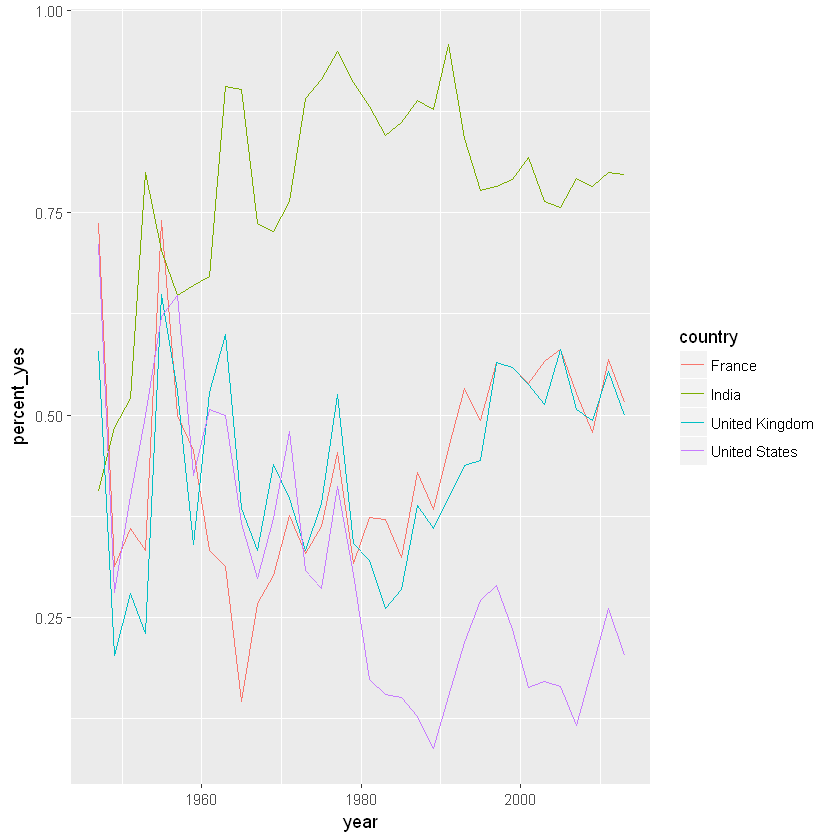

In [53]:
# Vector of four countries to examine
countries <- c("United States", "United Kingdom",
               "France", "India")

# Filter by_year_country: filtered_4_countries
filtered_4_countries = by_year_country %>% filter(country %in% countries)

# Line plot of % yes in four countries
ggplot(filtered_4_countries, aes(year, percent_yes, color=country)) +
  geom_line()

## Faceting - Video

Faceting by country
100xp
Now you'll take a look at six countries. While in the previous exercise you used color to represent distinct countries, this gets a little too crowded with six.

Instead, you will facet, giving each country its own sub-plot. To do so, you add a facet_wrap() step after all of your layers.

Instructions
Create a filtered version that contains these six countries called filtered_6_countries.
Use the filtered dataset (containing summarized data for six countries) to create a plot with one facet for each country.

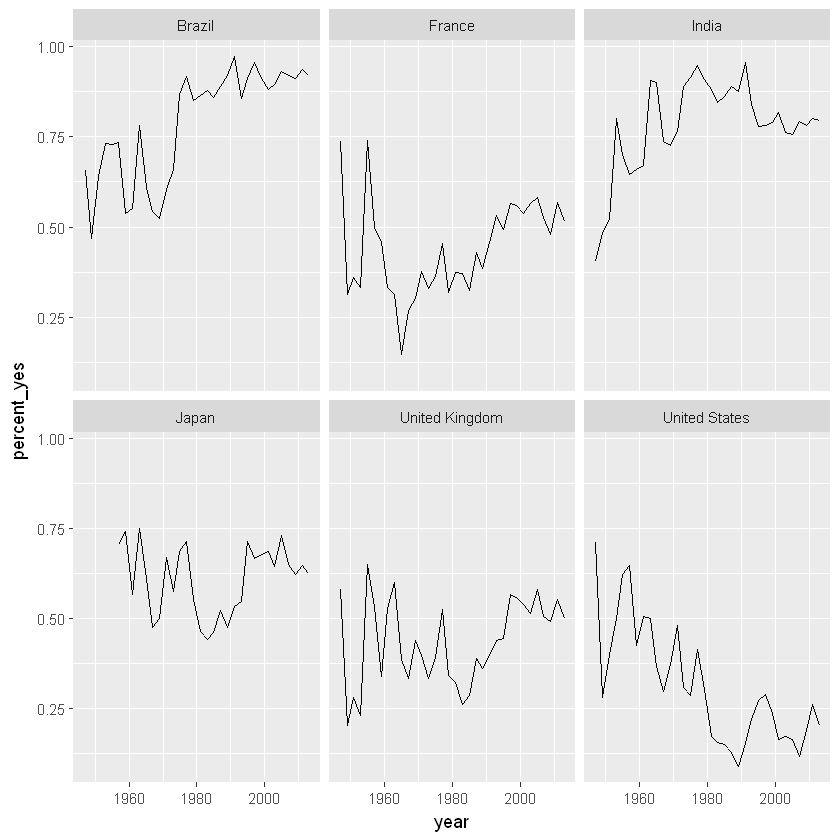

In [54]:
# Vector of six countries to examine
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India")

# Filtered by_year_country: filtered_6_countries
filtered_6_countries = by_year_country %>% filter(country %in% countries)

# Line plot of % yes over time faceted by country
ggplot(filtered_6_countries,aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~country)

Faceting with free y-axis
100xp
In the previous plot, all six graphs had the same axis limits. This made the changes over time hard to examine for plots with relatively little change.

Instead, you may want to let the plot choose a different y-axis for each facet.

Instructions
Change the faceted plot so that the y-axis is freely chosen for each facet, rather than being the same for all six.

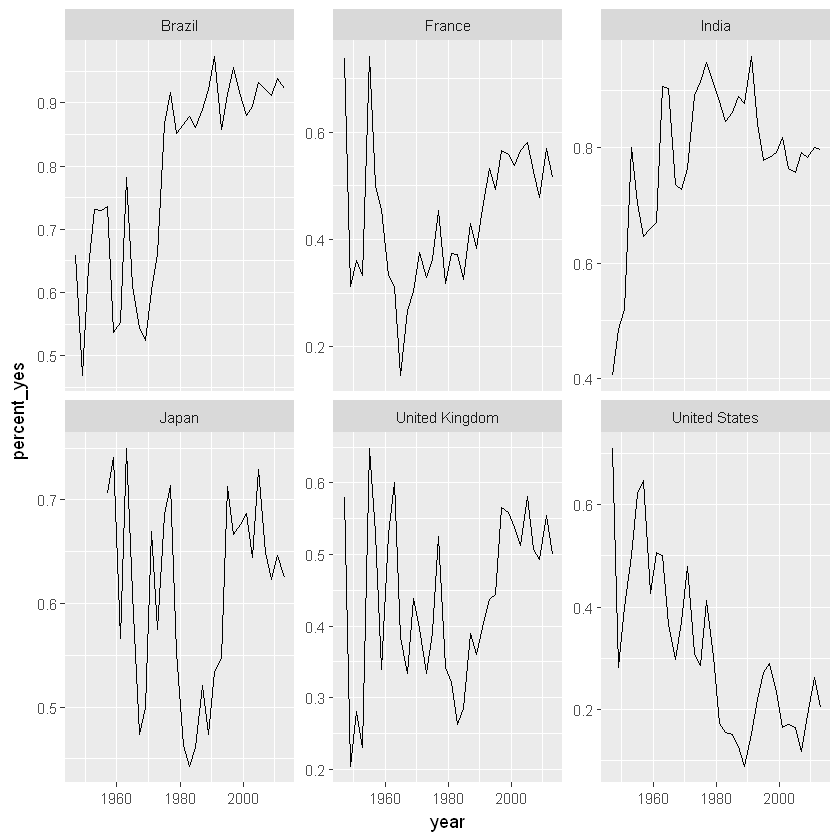

In [55]:
# Vector of six countries to examine
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India")

# Filtered by_year_country: filtered_6_countries
filtered_6_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes over time faceted by country
ggplot(filtered_6_countries, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~ country,scales = "free_y")

Choose your own countries
100xp
The purpose of an exploratory data analysis is to ask questions and answer them with data. Now it's your turn to ask the questions.

You'll choose some countries whose history you are interested in and add them to the graph. If you want to look up the full list of countries, enter by_country$country in the console.

Instructions
Add three more countries to the countries vector and therefore to the faceted graph.

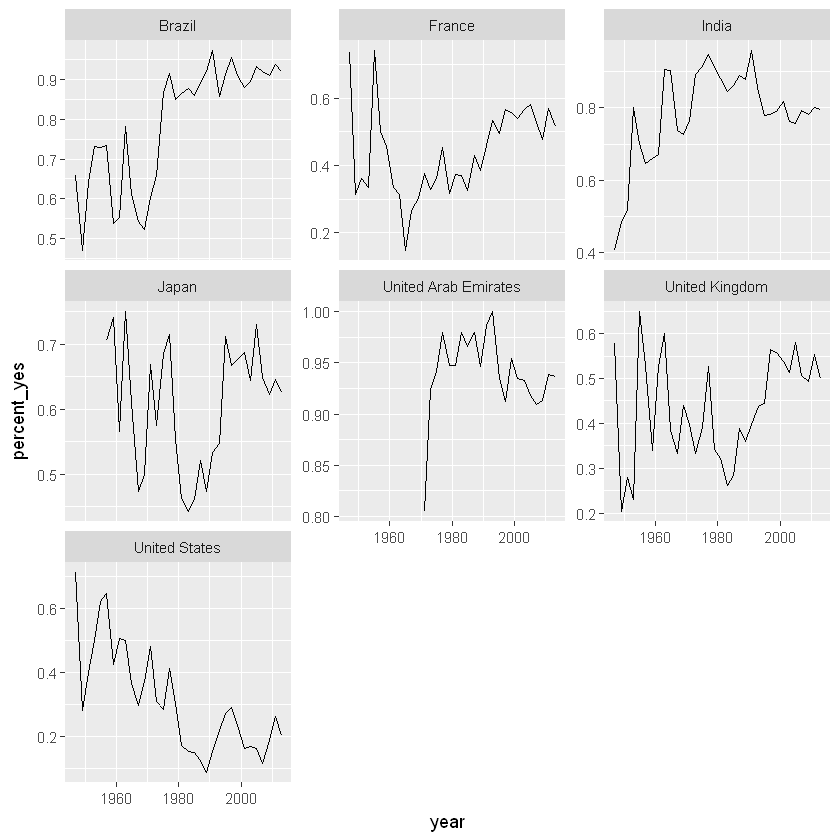

In [56]:
# Add three more countries to this list
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India", "United Arab Emirates", "United Arab Emirates","United Arab Emirates")

# Filtered by_year_country: filtered_countries
filtered_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes over time faceted by country
ggplot(filtered_countries, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~ country, scales = "free_y")

# 3. Tidy modeling with broom

While visualization helps you understand one country at a time, statistical modeling lets you quantify trends across many countries and interpret them together. Here you'll learn to use the tidyr, purrr, and broom packages to fit linear models to each country, and understand and compare their outputs.

## Linear regression - Video

### Linear regression on the United States
100xp
A linear regression is a model that lets us examine how one variable changes with respect to another by fitting a best fit line. It is done with the lm() function in R.

Here, you'll fit a linear regression to just the percentage of "yes" votes from the United States.

Instructions
Print the US_by_year data to the console.
Using just the US data in US_by_year, use lm() to run a linear regression predicting percent_yes from year. Save this to a variable US_fit.
Summarize US_fit using the summary() function.

In [57]:
# Percentage of yes votes from the US by year: US_by_year
US_by_year <- by_year_country %>%
  filter(country == "United States")

# Print the US_by_year data
US_by_year

# Perform a linear regression of percent_yes by year: US_fit
US_fit = lm(percent_yes ~ year, data =US_by_year)

# Perform summary() on the US_fit object
summary(US_fit)

year country       total percent_yes
1  1947 United States  38   0.7105263  
2  1949 United States  64   0.2812500  
3  1951 United States  25   0.4000000  
4  1953 United States  26   0.5000000  
5  1955 United States  37   0.6216216  
6  1957 United States  34   0.6470588  
7  1959 United States  54   0.4259259  
8  1961 United States  75   0.5066667  
9  1963 United States  32   0.5000000  
10 1965 United States  41   0.3658537  
11 1967 United States  57   0.2982456  
12 1969 United States  43   0.3720930  
13 1971 United States 125   0.4800000  
14 1973 United States  94   0.3085106  
15 1975 United States  70   0.2857143  
16 1977 United States  97   0.4123711  
17 1979 United States 122   0.3032787  
18 1981 United States 133   0.1729323  
19 1983 United States 149   0.1543624  
20 1985 United States 152   0.1513158  
21 1987 United States 141   0.1276596  
22 1989 United States 114   0.0877193  
23 1991 United States  72   0.1527778  
24 1993 United States  64   0.2187500  
25 1995 United States  81   0.2716049  
26 1997 United States  69   0.2898551  
27 1999 United States  68   0.2352941  
28 2001 United States  67   0.1641791  
29 2003 United States  76   0.1710526  
30 2005 United States  73   0.1643836  
31 2007 United States  77   0.1168831  
32 2009 United States  69   0.1884058  
33 2011 United States  65   0.2615385  
34 2013 United States  64   0.2031250


Call:
lm(formula = percent_yes ~ year, data = US_by_year)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.222491 -0.080635 -0.008661  0.081948  0.194307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.6641455  1.8379743   6.890 8.48e-08 ***
year        -0.0062393  0.0009282  -6.722 1.37e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1062 on 32 degrees of freedom
Multiple R-squared:  0.5854,	Adjusted R-squared:  0.5724 
F-statistic: 45.18 on 1 and 32 DF,  p-value: 1.367e-07


### Finding the slope of a linear regression

The US_fit object you created in the previous exercise is available in your workspace. Calling summary() on this gives you lots of useful information about the linear model.

What is the estimated slope of this relationship? Said differently, what's the estimated change each year of the probability of the US voting "yes"?

Possible Answers
 - 12.664
 - -0.006 (Correct)
 - 8.48e-08
 - 1.37e-07

In [ ]:
> summary(US_fit)

Call:
lm(formula = percent_yes ~ year, data = US_by_year)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.222491 -0.080635 -0.008661  0.081948  0.194307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.6641455  1.8379743   6.890 8.48e-08 ***
year        -0.0062393  0.0009282  -6.722 1.37e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1062 on 32 degrees of freedom
Multiple R-squared:  0.5854,	Adjusted R-squared:  0.5724 
F-statistic: 45.18 on 1 and 32 DF,  p-value: 1.367e-07
> 

### Finding the p-value of a linear regression

Not all positive or negative slopes are necessarily real. A p-value is a way of assessing whether a trend could be due to chance. Generally, data scientists set a threshold by declaring that, for example, p-values below .05 are significant.

US_fit is still available in your workspace. In this linear model, what is the p-value of the relationship between year and percent_yes?

Possible Answers
Click or Press Ctrl+1 to focus
 - 12.664
 - -0.006
 - 8.48e-08
 - 1.37e-07 (Correct)

## Tidying models with broom - Video

Tidying a linear regression model
100xp
In the last section, you fit a linear model. Now, you'll use the tidy() function in the broom package to turn that model into a tidy data frame.

Instructions
The US_fit linear model is available in your workspace.

Load the broom package.
Use the tidy() function from broom on the model object to turn it into a tidy data frame. Don't store the result; just print the output to the console.

In [58]:
# Load the broom package
library(broom)

# Call the tidy() function on the US_fit object
tidy(US_fit)

term        estimate     std.error    statistic p.value     
1 (Intercept) 12.664145512 1.8379742715  6.890274 8.477089e-08
2 year        -0.006239305 0.0009282243 -6.721764 1.366904e-07

### Combining models for multiple countries

One important advantage of changing models to tidied data frames is that they can be combined.

In an earlier section, you fit a linear model to the percentage of "yes" votes for each year in the United States. Now you'll fit the same model for the United Kingdom and combine the results from both countries.

Instructions
Fit a model for the United Kingdom similar to the one you fit for the US and save it as UK_fit.
Tidy US_fit into a data frame called US_tidied and the UK model into UK_tidied.
Use bind_rows() from dplyr to combine the two tidied models, printing the result to the console.

In [59]:
# Linear regression of percent_yes by year for US
US_by_year <- by_year_country %>%
  filter(country == "United States")
US_fit <- lm(percent_yes ~ year, US_by_year)

# Fit model for the United Kingdom
UK_by_year <- by_year_country %>%
  filter(country == "United Kingdom")
UK_fit <- lm(percent_yes ~ year, UK_by_year)

# Create US_tidied and UK_tidied
US_tidied = tidy(US_fit)
UK_tidied = tidy(UK_fit)

# Combine the two tidied models
bind_rows(US_tidied, UK_tidied)

term        estimate     std.error    statistic p.value     
1 (Intercept) 12.664145512 1.8379742715  6.890274 8.477089e-08
2 year        -0.006239305 0.0009282243 -6.721764 1.366904e-07
3 (Intercept) -3.266547873 1.9577739504 -1.668501 1.049736e-01
4 year         0.001869434 0.0009887262  1.890750 6.774177e-02

### Nesting a data frame

Right now, the by_year_country data frame has one row per country-vote pair. So that you can model each country individually, you're going to "nest" all columns besides country, which will result in a data frame with one row per country. The data for each individual country will then be stored in a list column called data.

Instructions
 - Load the tidyr package.
 - Use the nest() function to nest all the columns in by_year_country except country.

In [60]:
print(dim(by_year_country))
print(names(by_year_country))
print(glimpse(by_year_country))

[1] 4744    4
[1] "year"        "country"     "total"       "percent_yes"
Observations: 4,744
Variables: 4
$ year        <dbl> 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1...
$ country     <chr> "Afghanistan", "Argentina", "Australia", "Belarus", "Be...
$ total       <int> 34, 38, 38, 38, 38, 37, 38, 38, 38, 35, 33, 38, 38, 38,...
$ percent_yes <dbl> 0.3823529, 0.5789474, 0.5526316, 0.5000000, 0.6052632, ...
# A tibble: 4,744 x 4
    year                         country total percent_yes
   <dbl>                           <chr> <int>       <dbl>
1   1947                     Afghanistan    34   0.3823529
2   1947                       Argentina    38   0.5789474
3   1947                       Australia    38   0.5526316
4   1947                         Belarus    38   0.5000000
5   1947                         Belgium    38   0.6052632
6   1947 Bolivia, Plurinational State of    37   0.5945946
7   1947                          Brazil    38   0.6578947
8   1947                

## Nesting for multiple models - Video

In [61]:
# Load the tidyr package
library(tidyr)

# Nest all columns besides country
by_year_country %>% nest(-country)


country                                   
1   Afghanistan                               
2   Argentina                                 
3   Australia                                 
4   Belarus                                   
5   Belgium                                   
6   Bolivia, Plurinational State of           
7   Brazil                                    
8   Canada                                    
9   Chile                                     
10  Colombia                                  
11  Costa Rica                                
12  Cuba                                      
13  Czechoslovakia                            
14  Denmark                                   
15  Dominican Republic                        
16  Ecuador                                   
17  Egypt                                     
18  El Salvador                               
19  Ethiopia                                  
20  France                                    
21  Greece                                    
22  Guatemala                                 
23  Haiti                                     
24  Honduras                                  
25  Iceland                                   
26  India                                     
27  Iran, Islamic Republic of                 
28  Iraq                                      
29  Lebanon                                   
30  Liberia                                   
... ...                                       
171 Lithuania                                 
172 Marshall Islands                          
173 Micronesia, Federated States of           
174 Namibia                                   
175 San Marino                                
176 Yemen                                     
177 Andorra                                   
178 Croatia                                   
179 Czech Republic                            
180 Eritrea                                   
181 Georgia                                   
182 Kazakhstan                                
183 Kyrgyzstan                                
184 Macedonia, the former Yugoslav Republic of
185 Moldova, Republic of                      
186 Monaco                                    
187 Slovakia                                  
188 Slovenia                                  
189 Tajikistan                                
190 Turkmenistan                              
191 Palau                                     
192 Uzbekistan                                
193 Tonga                                     
194 Kiribati                                  
195 Nauru                                     
196 Tuvalu                                    
197 Switzerland                               
198 Timor-Leste                               
199 Montenegro                                
200 South Sudan                               
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
#Data output is coming wrong
#Columns in output should be country and data

### List columns

This "nested" data has an interesting structure. The second column, data, is a list, a type of R object that hasn't yet come up in this course that allows complicated objects to be stored within each row. This is because each item of the data column is itself a data frame.

`# A tibble: 200 × 2`
                           country              data
                             <chr>            <list>
1                      Afghanistan <tibble [34 × 3]>
2                        Argentina <tibble [34 × 3]>
3                        Australia <tibble [34 × 3]>
4                          Belarus <tibble [34 × 3]>
5                          Belgium <tibble [34 × 3]>
6  Bolivia, Plurinational State of <tibble [34 × 3]>
7                           Brazil <tibble [34 × 3]>
8                           Canada <tibble [34 × 3]>
9                            Chile <tibble [34 × 3]>
10                        Colombia <tibble [34 × 3]>
You can use nested$data to access this list column and double brackets to access a particular element. For example, nested$data[[1]] would give you the data frame with Afghanistan's voting history (the percent_yes per year), since Afghanistan is the first row of the table.

Instructions
Print the data frame from the data column that contains the data for Brazil.

In [30]:
library(purrr)

Warning message:
"package 'purrr' was built under R version 3.3.3"

In [62]:
# All countries are nested besides country
nested <- by_year_country %>%
  nest(-country)

# Print the nested data for Brazil
nested$data[[which(nested$country=="Brazil")]]

year total percent_yes
1  1947  38   0.6578947  
2  1949  64   0.4687500  
3  1951  25   0.6400000  
4  1953  26   0.7307692  
5  1955  37   0.7297297  
6  1957  34   0.7352941  
7  1959  54   0.5370370  
8  1961  76   0.5526316  
9  1963  32   0.7812500  
10 1965  41   0.6097561  
11 1967  57   0.5438596  
12 1969  42   0.5238095  
13 1971 121   0.6033058  
14 1973  91   0.6593407  
15 1975  68   0.8676471  
16 1977  96   0.9166667  
17 1979 121   0.8512397  
18 1981 134   0.8656716  
19 1983 148   0.8783784  
20 1985 151   0.8609272  
21 1987 145   0.8896552  
22 1989 115   0.9217391  
23 1991  74   0.9729730  
24 1993  63   0.8571429  
25 1995  80   0.9125000  
26 1997  69   0.9565217  
27 1999  68   0.9117647  
28 2001  67   0.8805970  
29 2003  76   0.8947368  
30 2005  74   0.9324324  
31 2007  76   0.9210526  
32 2009  68   0.9117647  
33 2011  65   0.9384615  
34 2013  64   0.9218750

## Unnesting
100xp
The opposite of the nest() operation is the unnest() operation. This takes each of the data frames in the list column and brings those rows back to the main data frame.

In this exercise, you are just undoing the nest() operation. In the next section, you'll learn how to fit a model in between these nesting and unnesting steps that makes this process useful.

Instructions
 - Unnest the data list column, so that the table again has one row for each country-year pair, much like by_year_country.

In [63]:
# All countries are nested besides country
nested <- by_year_country %>%
  nest(-country)

# Unnest the data column to return it to its original form
nested <- by_year_country %>%
  nest(-country) %>%
  unnest(data)

### Unnesting
100xp
The opposite of the nest() operation is the unnest() operation. This takes each of the data frames in the list column and brings those rows back to the main data frame.

In this exercise, you are just undoing the nest() operation. In the next section, you'll learn how to fit a model in between these nesting and unnesting steps that makes this process useful.

Instructions
 - Unnest the data list column, so that the table again has one row for each country-year pair, much like by_year_country.

In [64]:
# All countries are nested besides country
nested <- by_year_country %>%
  nest(-country)

# Unnest the data column to return it to its original form
by_year_country %>%
  nest(-country) %>%
  unnest(data)

country     year total percent_yes
1    Afghanistan 1947  34   0.3823529  
2    Afghanistan 1949  51   0.6078431  
3    Afghanistan 1951  25   0.7600000  
4    Afghanistan 1953  26   0.7692308  
5    Afghanistan 1955  37   0.7297297  
6    Afghanistan 1957  34   0.5294118  
7    Afghanistan 1959  54   0.6111111  
8    Afghanistan 1961  76   0.6052632  
9    Afghanistan 1963  32   0.7812500  
10   Afghanistan 1965  40   0.8500000  
11   Afghanistan 1967  57   0.7368421  
12   Afghanistan 1969  42   0.8333333  
13   Afghanistan 1971 122   0.7786885  
14   Afghanistan 1973  92   0.8478261  
15   Afghanistan 1975  68   0.9117647  
16   Afghanistan 1977  95   0.9578947  
17   Afghanistan 1979 114   0.8771930  
18   Afghanistan 1981 125   0.8400000  
19   Afghanistan 1983 146   0.8698630  
20   Afghanistan 1985 148   0.8783784  
21   Afghanistan 1987 140   0.9571429  
22   Afghanistan 1989 114   0.9473684  
23   Afghanistan 1991  67   0.9701493  
24   Afghanistan 1993  55   0.9454545  
25   Afghanistan 1995  70   0.9000000  
26   Afghanistan 1997  59   0.9322034  
27   Afghanistan 1999  26   0.8461538  
28   Afghanistan 2001  38   0.9473684  
29   Afghanistan 2003  59   0.9661017  
30   Afghanistan 2005  66   0.9545455  
...  ...         ...  ...   ...        
4715 Nauru       2005  8    0.1250000  
4716 Nauru       2007 58    0.6379310  
4717 Nauru       2009 29    0.2068966  
4718 Nauru       2011 24    0.2500000  
4719 Nauru       2013 32    0.7812500  
4720 Tuvalu      2001 20    0.4000000  
4721 Tuvalu      2003 41    0.7073171  
4722 Tuvalu      2005 55    0.7272727  
4723 Tuvalu      2007 32    0.9375000  
4724 Tuvalu      2009 23    0.8695652  
4725 Tuvalu      2011 47    0.9361702  
4726 Tuvalu      2013 54    0.9629630  
4727 Switzerland 2003 76    0.5921053  
4728 Switzerland 2005 73    0.6712329  
4729 Switzerland 2007 77    0.6493506  
4730 Switzerland 2009 68    0.6176471  
4731 Switzerland 2011 62    0.6612903  
4732 Switzerland 2013 64    0.6406250  
4733 Timor-Leste 2003 70    0.9714286  
4734 Timor-Leste 2005 62    1.0000000  
4735 Timor-Leste 2007 45    0.9777778  
4736 Timor-Leste 2009 36    0.8333333  
4737 Timor-Leste 2011 57    0.9473684  
4738 Timor-Leste 2013 56    0.9642857  
4739 Montenegro  2007 76    0.6447368  
4740 Montenegro  2009 68    0.5882353  
4741 Montenegro  2011 64    0.6406250  
4742 Montenegro  2013 64    0.6093750  
4743 South Sudan 2011 17    0.9411765  
4744 South Sudan 2013 36    0.5000000

## Fitting multiple models - Video

Performing linear regression on each nested dataset
100xp

Now that you've divided the data for each country into a separate dataset in the data column, you need to fit a linear model to each of these datasets.

The map() function from purrr works by applying a formula to each item in a list, where . represents the individual item. For example, you could add one to each of a list of numbers:

map(numbers, ~ 1 + .)

This means that to fit a model to each dataset, you can do:

map(data, ~ lm(percent_yes ~ year, data = .))

where . represents each individual item from the data column in by_year_country. Recall that each item in the data column is a dataset that pertains to a specific country.
Instructions

    Load the tidyr and purrr packages.
    After nesting, use the map() function within a mutate() to perform a linear regression on each dataset (i.e. each item in the data column in by_year_country) modeling percent_yes as a function of year. Save the results to the model column.


In [65]:
by_year_country %>%
  nest(-country)

country                                   
1   Afghanistan                               
2   Argentina                                 
3   Australia                                 
4   Belarus                                   
5   Belgium                                   
6   Bolivia, Plurinational State of           
7   Brazil                                    
8   Canada                                    
9   Chile                                     
10  Colombia                                  
11  Costa Rica                                
12  Cuba                                      
13  Czechoslovakia                            
14  Denmark                                   
15  Dominican Republic                        
16  Ecuador                                   
17  Egypt                                     
18  El Salvador                               
19  Ethiopia                                  
20  France                                    
21  Greece                                    
22  Guatemala                                 
23  Haiti                                     
24  Honduras                                  
25  Iceland                                   
26  India                                     
27  Iran, Islamic Republic of                 
28  Iraq                                      
29  Lebanon                                   
30  Liberia                                   
... ...                                       
171 Lithuania                                 
172 Marshall Islands                          
173 Micronesia, Federated States of           
174 Namibia                                   
175 San Marino                                
176 Yemen                                     
177 Andorra                                   
178 Croatia                                   
179 Czech Republic                            
180 Eritrea                                   
181 Georgia                                   
182 Kazakhstan                                
183 Kyrgyzstan                                
184 Macedonia, the former Yugoslav Republic of
185 Moldova, Republic of                      
186 Monaco                                    
187 Slovakia                                  
188 Slovenia                                  
189 Tajikistan                                
190 Turkmenistan                              
191 Palau                                     
192 Uzbekistan                                
193 Tonga                                     
194 Kiribati                                  
195 Nauru                                     
196 Tuvalu                                    
197 Switzerland                               
198 Timor-Leste                               
199 Montenegro                                
200 South Sudan                               
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [66]:
# Load tidyr and purrr
library(tidyr)
library(purrr)

# Perform a linear regression on each item in the data column
by_year_country %>%
  nest(-country) %>% 
  mutate(model=map(data, ~ lm(percent_yes~year, .)))

country                                   
1   Afghanistan                               
2   Argentina                                 
3   Australia                                 
4   Belarus                                   
5   Belgium                                   
6   Bolivia, Plurinational State of           
7   Brazil                                    
8   Canada                                    
9   Chile                                     
10  Colombia                                  
11  Costa Rica                                
12  Cuba                                      
13  Czechoslovakia                            
14  Denmark                                   
15  Dominican Republic                        
16  Ecuador                                   
17  Egypt                                     
18  El Salvador                               
19  Ethiopia                                  
20  France                                    
21  Greece                                    
22  Guatemala                                 
23  Haiti                                     
24  Honduras                                  
25  Iceland                                   
26  India                                     
27  Iran, Islamic Republic of                 
28  Iraq                                      
29  Lebanon                                   
30  Liberia                                   
... ...                                       
171 Lithuania                                 
172 Marshall Islands                          
173 Micronesia, Federated States of           
174 Namibia                                   
175 San Marino                                
176 Yemen                                     
177 Andorra                                   
178 Croatia                                   
179 Czech Republic                            
180 Eritrea                                   
181 Georgia                                   
182 Kazakhstan                                
183 Kyrgyzstan                                
184 Macedonia, the former Yugoslav Republic of
185 Moldova, Republic of                      
186 Monaco                                    
187 Slovakia                                  
188 Slovenia                                  
189 Tajikistan                                
190 Turkmenistan                              
191 Palau                                     
192 Uzbekistan                                
193 Tonga                                     
194 Kiribati                                  
195 Nauru                                     
196 Tuvalu                                    
197 Switzerland                               
198 Timor-Leste                               
199 Montenegro                                
200 South Sudan                               
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### Tidy each linear regression model
100xp

You've now performed a linear regression on each nested dataset and have a linear model stored in the list column model. But you can't recombine the models until you've tidied each into a table of coefficients. To do that, you'll need to use map() one more time and the tidy() function from the broom package.

Recall that you can simply give a function to map() (e.g. map(models, tidy)) in order to apply that function to each item of a list.
Instructions

    Load the broom package.
   - Use the map() function to apply the tidy() function to each linear model in the model column, creating a new column called tidied.


In [67]:
# Load the broom package
library(broom)

# Add another mutate that applies tidy() to each model
by_year_country %>%
  nest(-country) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .))) %>%
  mutate(tidied = map(model, tidy))

country                                   
1   Afghanistan                               
2   Argentina                                 
3   Australia                                 
4   Belarus                                   
5   Belgium                                   
6   Bolivia, Plurinational State of           
7   Brazil                                    
8   Canada                                    
9   Chile                                     
10  Colombia                                  
11  Costa Rica                                
12  Cuba                                      
13  Czechoslovakia                            
14  Denmark                                   
15  Dominican Republic                        
16  Ecuador                                   
17  Egypt                                     
18  El Salvador                               
19  Ethiopia                                  
20  France                                    
21  Greece                                    
22  Guatemala                                 
23  Haiti                                     
24  Honduras                                  
25  Iceland                                   
26  India                                     
27  Iran, Islamic Republic of                 
28  Iraq                                      
29  Lebanon                                   
30  Liberia                                   
... ...                                       
171 Lithuania                                 
172 Marshall Islands                          
173 Micronesia, Federated States of           
174 Namibia                                   
175 San Marino                                
176 Yemen                                     
177 Andorra                                   
178 Croatia                                   
179 Czech Republic                            
180 Eritrea                                   
181 Georgia                                   
182 Kazakhstan                                
183 Kyrgyzstan                                
184 Macedonia, the former Yugoslav Republic of
185 Moldova, Republic of                      
186 Monaco                                    
187 Slovakia                                  
188 Slovenia                                  
189 Tajikistan                                
190 Turkmenistan                              
191 Palau                                     
192 Uzbekistan                                
193 Tonga                                     
194 Kiribati                                  
195 Nauru                                     
196 Tuvalu                                    
197 Switzerland                               
198 Timor-Leste                               
199 Montenegro                                
200 South Sudan                               
    data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### Unnesting a data frame
100xp

You now have a tidied version of each model stored in the tidied column. You want to combine all of those into a large data frame, similar to how you combined the US and UK tidied models earlier. Recall that the unnest() function from tidyr achieves this.
Instructions

    - Add an unnest() step to unnest the tidied models stored in the tidied column. Save the result as country_coefficients.
    - Print the resulting country_coefficients object to the console.


In [68]:
# Add one more step that unnests the tidied column
country_coefficients = by_year_country %>%
  nest(-country) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
         tidied = map(model, tidy)) %>%
  unnest(tidied)

# Print the resulting country_coefficients variable
country_coefficients

country                         term        estimate      std.error   
1   Afghanistan                     (Intercept) -11.063084650 1.4705189228
2   Afghanistan                     year          0.006009299 0.0007426499
3   Argentina                       (Intercept)  -9.464512565 2.1008982371
4   Argentina                       year          0.005148829 0.0010610076
5   Australia                       (Intercept)  -4.545492536 2.1479916283
6   Australia                       year          0.002567161 0.0010847910
7   Belarus                         (Intercept)  -7.000692717 1.5024232546
8   Belarus                         year          0.003907557 0.0007587624
9   Belgium                         (Intercept)  -5.845534016 1.5153390521
10  Belgium                         year          0.003203234 0.0007652852
11  Bolivia, Plurinational State of (Intercept) -10.669821650 1.9122817691
12  Bolivia, Plurinational State of year          0.005802864 0.0009657515
13  Brazil                          (Intercept) -11.302829425 1.6172911720
14  Brazil                          year          0.006107151 0.0008167736
15  Canada                          (Intercept)  -2.484177860 1.8914121391
16  Canada                          year          0.001515867 0.0009552118
17  Chile                           (Intercept) -12.626252985 1.6277316096
18  Chile                           year          0.006775560 0.0008220463
19  Colombia                        (Intercept) -11.395593305 1.9098204085
20  Colombia                        year          0.006157755 0.0009645084
21  Costa Rica                      (Intercept) -12.155863010 1.6076633311
22  Costa Rica                      year          0.006539273 0.0008119113
23  Cuba                            (Intercept)  -8.359156542 1.4266657646
24  Cuba                            year          0.004610867 0.0007205029
25  Czechoslovakia                  (Intercept)  -8.400479208 3.7058589260
26  Czechoslovakia                  year          0.004617632 0.0018820593
27  Denmark                         (Intercept)  -2.858907651 1.6955748850
28  Denmark                         year          0.001733764 0.0008563089
29  Dominican Republic              (Intercept) -15.178825381 1.8091129204
30  Dominican Republic              year          0.008055482 0.0009138578
... ...                             ...         ...           ...         
370 Monaco                          (Intercept)  1.752636e+01  9.153877429
371 Monaco                          year        -8.423266e-03  0.004570061
372 Slovakia                        (Intercept) -1.245742e+00  5.138007589
373 Slovakia                        year         9.308263e-04  0.002565143
374 Slovenia                        (Intercept)  3.188757e-01  2.394558245
375 Slovenia                        year         1.544350e-04  0.001195480
376 Tajikistan                      (Intercept) -2.458567e+01  5.781869354
377 Tajikistan                      year         1.268098e-02  0.002886301
378 Turkmenistan                    (Intercept) -1.524357e+01  7.071669440
379 Turkmenistan                    year         8.053834e-03  0.003530521
380 Palau                           (Intercept)  3.428863e+01 21.706253827
381 Palau                           year        -1.689278e-02  0.010823323
382 Uzbekistan                      (Intercept) -4.046982e+01 12.922275898
383 Uzbekistan                      year         2.055243e-02  0.006447141
384 Tonga                           (Intercept)  3.131789e+01 11.005098246
385 Tonga                           year        -1.522381e-02  0.005486077
386 Kiribati                        (Intercept)  3.114035e+01 17.424726190
387 Kiribati                        year        -1.503759e-02  0.008681959
388 Nauru                           (Intercept)  2.812780e+01 58.509390571
389 Nauru                           year        -1.376865e-02  0.029152603
390 Tuvalu                          (Intercept) -8.124056e+01 19.910992468
391 Tuvalu                   

## Working with many tidy models - Video

In [ ]:
Filtering model terms
100xp

You currently have both the intercept and slope terms for each by-country model. You're probably more interested in how each is changing over time, so you want to focus on the slope terms.
Instructions

    Print the country_coefficients data frame to the console.
    Perform a filter() step that extracts only the slope (not intercept) terms.


In [69]:
# Print the country_coefficients dataset
country_coefficients

# Filter for only the slope terms
country_coefficients %>% filter(term=="year")

country                         term        estimate      std.error   
1   Afghanistan                     (Intercept) -11.063084650 1.4705189228
2   Afghanistan                     year          0.006009299 0.0007426499
3   Argentina                       (Intercept)  -9.464512565 2.1008982371
4   Argentina                       year          0.005148829 0.0010610076
5   Australia                       (Intercept)  -4.545492536 2.1479916283
6   Australia                       year          0.002567161 0.0010847910
7   Belarus                         (Intercept)  -7.000692717 1.5024232546
8   Belarus                         year          0.003907557 0.0007587624
9   Belgium                         (Intercept)  -5.845534016 1.5153390521
10  Belgium                         year          0.003203234 0.0007652852
11  Bolivia, Plurinational State of (Intercept) -10.669821650 1.9122817691
12  Bolivia, Plurinational State of year          0.005802864 0.0009657515
13  Brazil                          (Intercept) -11.302829425 1.6172911720
14  Brazil                          year          0.006107151 0.0008167736
15  Canada                          (Intercept)  -2.484177860 1.8914121391
16  Canada                          year          0.001515867 0.0009552118
17  Chile                           (Intercept) -12.626252985 1.6277316096
18  Chile                           year          0.006775560 0.0008220463
19  Colombia                        (Intercept) -11.395593305 1.9098204085
20  Colombia                        year          0.006157755 0.0009645084
21  Costa Rica                      (Intercept) -12.155863010 1.6076633311
22  Costa Rica                      year          0.006539273 0.0008119113
23  Cuba                            (Intercept)  -8.359156542 1.4266657646
24  Cuba                            year          0.004610867 0.0007205029
25  Czechoslovakia                  (Intercept)  -8.400479208 3.7058589260
26  Czechoslovakia                  year          0.004617632 0.0018820593
27  Denmark                         (Intercept)  -2.858907651 1.6955748850
28  Denmark                         year          0.001733764 0.0008563089
29  Dominican Republic              (Intercept) -15.178825381 1.8091129204
30  Dominican Republic              year          0.008055482 0.0009138578
... ...                             ...         ...           ...         
370 Monaco                          (Intercept)  1.752636e+01  9.153877429
371 Monaco                          year        -8.423266e-03  0.004570061
372 Slovakia                        (Intercept) -1.245742e+00  5.138007589
373 Slovakia                        year         9.308263e-04  0.002565143
374 Slovenia                        (Intercept)  3.188757e-01  2.394558245
375 Slovenia                        year         1.544350e-04  0.001195480
376 Tajikistan                      (Intercept) -2.458567e+01  5.781869354
377 Tajikistan                      year         1.268098e-02  0.002886301
378 Turkmenistan                    (Intercept) -1.524357e+01  7.071669440
379 Turkmenistan                    year         8.053834e-03  0.003530521
380 Palau                           (Intercept)  3.428863e+01 21.706253827
381 Palau                           year        -1.689278e-02  0.010823323
382 Uzbekistan                      (Intercept) -4.046982e+01 12.922275898
383 Uzbekistan                      year         2.055243e-02  0.006447141
384 Tonga                           (Intercept)  3.131789e+01 11.005098246
385 Tonga                           year        -1.522381e-02  0.005486077
386 Kiribati                        (Intercept)  3.114035e+01 17.424726190
387 Kiribati                        year        -1.503759e-02  0.008681959
388 Nauru                           (Intercept)  2.812780e+01 58.509390571
389 Nauru                           year        -1.376865e-02  0.029152603
390 Tuvalu                          (Intercept) -8.124056e+01 19.910992468
391 Tuvalu                   

country                                    term estimate      std.error   
1   Afghanistan                                year 0.006009299   0.0007426499
2   Argentina                                  year 0.005148829   0.0010610076
3   Australia                                  year 0.002567161   0.0010847910
4   Belarus                                    year 0.003907557   0.0007587624
5   Belgium                                    year 0.003203234   0.0007652852
6   Bolivia, Plurinational State of            year 0.005802864   0.0009657515
7   Brazil                                     year 0.006107151   0.0008167736
8   Canada                                     year 0.001515867   0.0009552118
9   Chile                                      year 0.006775560   0.0008220463
10  Colombia                                   year 0.006157755   0.0009645084
11  Costa Rica                                 year 0.006539273   0.0008119113
12  Cuba                                       year 0.004610867   0.0007205029
13  Czechoslovakia                             year 0.004617632   0.0018820593
14  Denmark                                    year 0.001733764   0.0008563089
15  Dominican Republic                         year 0.008055482   0.0009138578
16  Ecuador                                    year 0.005771617   0.0009337861
17  Egypt                                      year 0.004258493   0.0007670544
18  El Salvador                                year 0.006139795   0.0008507182
19  Ethiopia                                   year 0.005102424   0.0009625961
20  France                                     year 0.002129600   0.0010937431
21  Greece                                     year 0.001501667   0.0009571852
22  Guatemala                                  year 0.005852422   0.0010413158
23  Haiti                                      year 0.005382755   0.0006988103
24  Honduras                                   year 0.007717977   0.0009214260
25  Iceland                                    year 0.000611627   0.0010433883
26  India                                      year 0.003059099   0.0009959861
27  Iran, Islamic Republic of                  year 0.003911100   0.0008558952
28  Iraq                                       year 0.004827431   0.0008635939
29  Lebanon                                    year 0.004565698   0.0008417836
30  Liberia                                    year 0.004621994   0.0009875743
... ...                                        ...  ...           ...         
170 Lithuania                                  year  0.0007122065 0.0015904132
171 Marshall Islands                           year -0.0125510857 0.0056094765
172 Micronesia, Federated States of            year -0.0176422227 0.0059189978
173 Namibia                                    year  0.0007356649 0.0014165305
174 San Marino                                 year -0.0088601285 0.0045780231
175 Yemen                                      year -0.0042534952 0.0009507586
176 Andorra                                    year  0.0005368590 0.0025159548
177 Croatia                                    year -0.0020566698 0.0021487324
178 Czech Republic                             year -0.0008179245 0.0021976010
179 Eritrea                                    year  0.0165849064 0.0066516133
180 Georgia                                    year  0.0060157706 0.0033750666
181 Kazakhstan                                 year  0.0109557407 0.0019482401
182 Kyrgyzstan                                 year  0.0097254619 0.0009884060
183 Macedonia, the former Yugoslav Republic of year -0.0033329413 0.0012905719
184 Moldova, Republic of                       year -0.0006353356 0.0018937812
185 Monaco                                     year -0.0084232662 0.0045700608
186 Slovakia                                   year  0.0009308263 0.0025651433
187 Slovenia                                   year  0.0001544350 0.0011954799
188 Tajikistan                                 year  0

### Filtering for significant countries
100xp

Not all slopes are significant, and you can use the p-value to guess which are and which are not.

However, when you have lots of p-values, like one for each country, you run into the problem of multiple hypothesis testing, where you have to set a stricter threshold. The p.adjust() function is a simple way to correct for this, where p.adjust(p.value) on a vector of p-values returns a set that you can trust.

Here you'll add two steps to process the slope_terms dataset: use a mutate to create the new, adjusted p-value column, and filter to filter for those below a .05 threshold.
Instructions

Use the p.adjust() function to adjust the p.value column, saving the result into a new p.adjusted column. Then, filter for cases where p.adjusted is less than .05.

In [70]:
# Filter for only the slope terms
slope_terms <- country_coefficients %>%
  filter(term == "year")

# Add p.adjusted column, then filter
slope_terms %>%
  mutate(p.adjusted =p.adjust(p.value)) %>%
  filter(p.adjusted<0.5)

country                         term estimate     std.error    statistic
1   Afghanistan                     year 0.006009299  0.0007426499 8.091698 
2   Argentina                       year 0.005148829  0.0010610076 4.852773 
3   Belarus                         year 0.003907557  0.0007587624 5.149908 
4   Belgium                         year 0.003203234  0.0007652852 4.185673 
5   Bolivia, Plurinational State of year 0.005802864  0.0009657515 6.008651 
6   Brazil                          year 0.006107151  0.0008167736 7.477164 
7   Chile                           year 0.006775560  0.0008220463 8.242310 
8   Colombia                        year 0.006157755  0.0009645084 6.384346 
9   Costa Rica                      year 0.006539273  0.0008119113 8.054171 
10  Cuba                            year 0.004610867  0.0007205029 6.399512 
11  Dominican Republic              year 0.008055482  0.0009138578 8.814809 
12  Ecuador                         year 0.005771617  0.0009337861 6.180877 
13  Egypt                           year 0.004258493  0.0007670544 5.551748 
14  El Salvador                     year 0.006139795  0.0008507182 7.217191 
15  Ethiopia                        year 0.005102424  0.0009625961 5.300691 
16  Guatemala                       year 0.005852422  0.0010413158 5.620218 
17  Haiti                           year 0.005382755  0.0006988103 7.702742 
18  Honduras                        year 0.007717977  0.0009214260 8.376123 
19  India                           year 0.003059099  0.0009959861 3.071427 
20  Iran, Islamic Republic of       year 0.003911100  0.0008558952 4.569602 
21  Iraq                            year 0.004827431  0.0008635939 5.589932 
22  Lebanon                         year 0.004565698  0.0008417836 5.423838 
23  Liberia                         year 0.004621994  0.0009875743 4.680148 
24  Mexico                          year 0.005304457  0.0008840521 6.000164 
25  Netherlands                     year 0.003183090  0.0009268302 3.434384 
26  New Zealand                     year 0.004608992  0.0010315288 4.468118 
27  Nicaragua                       year 0.007075848  0.0010716402 6.602820 
28  Pakistan                        year 0.003144068  0.0009513525 3.304840 
29  Panama                          year 0.004714611  0.0010942783 4.308421 
30  Paraguay                        year 0.006733868  0.0007238849 9.302402 
... ...                             ...  ...          ...          ...      
61  Burkina Faso                    year  0.003304870 0.0009711392  3.403085
62  Central African Republic        year  0.005564901 0.0013039074  4.267865
63  Congo                           year  0.003967778 0.0009220262  4.303324
64  Gabon                           year  0.004207609 0.0010727483  3.922271
65  Madagascar                      year  0.004946551 0.0008993170  5.500342
66  Mali                            year  0.003379043 0.0009678056  3.491448
67  Mauritania                      year  0.003185441 0.0008784225  3.626320
68  Mongolia                        year  0.007041027 0.0012407928  5.674620
69  Senegal                         year  0.004413713 0.0009585373  4.604634
70  Sierra Leone                    year  0.003996615 0.0009311228  4.292254
71  Somalia                         year  0.003040239 0.0009473698  3.209137
72  Tanzania, United Republic of    year  0.002619988 0.0008275646  3.165901
73  Togo                            year  0.004069190 0.0012274294  3.315213
74  Algeria                         year  0.003189356 0.0008782381  3.631540
75  Jamaica                         year  0.003481086 0.0009934094  3.504181
76  Malawi                          year  0.009084873 0.0018111087  5.016194
77  Maldives                        year  0.004213624 0.0009627126  4.376825
78  Singapore                       year  0.003839227 0.0011773524  3.260899
79  Barbados                        year  0.005612843 0.0013351968  4.203757
80  Bahamas                         year  0.004993503 0.0015336967  3.255861


Notice that there are now only 61 countries with significant trends. 

### Sorting by slope
100xp

Now that you've filtered for countries where the trend is probably not due to chance, you may be interested in countries whose percentage of "yes" votes is changing most quickly over time. Thus, you want to find the countries with the highest and lowest slopes; that is, the estimate column.
Instructions

   - Using arrange() and desc(), sort the filtered countries to find the countries whose percentage "yes" is most quickly increasing over time.
   - Using arrange(), sort to find the countries whose percentage "yes" is most quickly decreasing.


In [ ]:
# Filter by adjusted p-values
filtered_countries <- country_coefficients %>%
  filter(term == "year") %>%
  mutate(p.adjusted = p.adjust(p.value)) %>%
  filter(p.adjusted < .05)

# Sort for the countries increasing most quickly
filtered_countries %>% arrange(desc(estimate))

# Sort for the countries decreasing most quickly
filtered_countries %>% arrange(estimate)

# 4. Joining and tidying

In this chapter, you'll learn to combine multiple related datasets, such as incorporating information about each resolution's topic into your vote analysis. You'll also learn how to turn untidy data into tidy data, and see how tidy data can guide your exploration of topics and countries over time.

### Joining datasets with inner_join
100xp

In the first chapter, you created the votes_processed dataset, containing information about each country's votes. You'll now combine that with the new descriptions dataset, which includes topic information about each country, so that you can analyze votes within particular topics.

To do this, you'll make use of the inner_join() function from dplyr.
Instructions

    - Load the dplyr package.
    - Print the votes_processed dataset.
    - Print the new descriptions dataset.
    - Join the two datasets using dplyr's inner_join(), using the rcid and session columns to match them. Save as votes_joined.


In [73]:
descriptions = readRDS("descriptions.rds")

In [75]:
head(descriptions)

rcid session date       unres   me nu di hr co ec
1 46   2       1947-09-04 R/2/299 0  0  0  0  0  0 
2 47   2       1947-10-05 R/2/355 0  0  0  1  0  0 
3 48   2       1947-10-06 R/2/461 0  0  0  0  0  0 
4 49   2       1947-10-06 R/2/463 0  0  0  0  0  0 
5 50   2       1947-10-06 R/2/465 0  0  0  0  0  0 
6 51   2       1947-10-02 R/2/561 0  0  0  0  1  0

In [ ]:
# Load dplyr package
library(dplyr)

# Print the votes_processed dataset
votes_processed

# Print the descriptions dataset
descriptions

# Join them together based on the "rcid" and "session" columns
votes_joined = inner_join(votes_processed, descriptions, by=c("rcid", "session"))

### Filtering the joined dataset
100xp

There are six columns in the descriptions dataset (and therefore in the new joined dataset) that describe the topic of a resolution:

   -  me: Palestinian conflict
   -  nu: Nuclear weapons and nuclear material
   -  di: Arms control and disarmament
   -  hr: Human rights
   -  co: Colonialism
   -  ec: Economic development

Each contains a 1 if the resolution is related to this topic and a 0 otherwise.
Instructions

 - Filter the votes_joined dataset for votes relating to colonialism.

In [ ]:
# Filter for votes related to colonialism
votes_joined %>% filter(co==1)

### Visualizing colonialism votes
100xp

In an earlier exercise, you graphed the percentage of votes each year where the US voted "yes". Now you'll create that same graph, but only for votes related to colonialism.
Instructions

    - Load the ggplot2 package.
    - Filter the votes_joined dataset for only votes by the United States relating to colonialism, then summarize() the percentage of votes that are "yes" within each year. Name the resulting column percent_yes and save the entire data frame as US_co_by_year.
    - Add a geom_line() layer to your ggplot() call to create a line graph of the percentage of "yes" votes on colonialism (percent_yes) cast by the US over time.


In [ ]:
# Load the ggplot2 package
library(ggplot2)

# Filter, then summarize by year: US_co_by_year
US_co_by_year = votes_joined %>% 
filter(country=="United States" , co==1) %>%
group_by(year) %>%
summarize(percent_yes = mean(vote==1))

# Graph the % of "yes" votes over time
ggplot(US_co_by_year, aes(year,percent_yes)) +
geom_line()

## Tidy data - Video

### Tidy data observations
50xp

According to the tidy data framework, which of the following counts as an observation in this graph?
Possible Answers

    - A country
    - A vote
    - A country-vote combination
    - A country-topic combination
    - A country-vote-topic combination (Correct)

In [ ]:
A single point in one of the lines on the graph uniquely represents a country-vote-topic combination. 

### Using gather to tidy a dataset
100xp

In order to represent the joined vote-topic data in a tidy form so we can analyze and graph by topic, we need to transform the data so that each row has one combination of country-vote-topic. This will change the data from having six columns (me, nu, di, hr, co, ec) to having two columns (topic and has_topic).
Instructions

    - Load the tidyr package.
    - Gather the six topic columns in votes_joined into one column called topic (containing one of me, nu, etc.) and a column called has_topic (containing 0 or 1). Print the result without saving it.
    - You don't actually care about the cases where has_topic is 0. Perform the gather() operation again, but this time also filter for only the rows where the topic in topic describes the vote. Save the result as votes_gathered.


In [ ]:
# Load the tidyr package
library(tidyr)

# Gather the six me/nu/di/hr/co/ec columns
gather(votes_joined, topic, has_topic, me:ec)

# Perform gather again, then filter
votes_gathered = gather(votes_joined, topic, has_topic, me:ec) %>%
filter(has_topic==1)

### Recoding the topics
100xp

There's one more step of data cleaning to make this more interpretable. Right now, topics are represented by two-letter codes:

    - me: Palestinian conflict
    - nu: Nuclear weapons and nuclear material
    - di: Arms control and disarmament
    - hr: Human rights
    - co: Colonialism
    - ec: Economic development

So that you can interpret the data more easily, recode the data to replace these codes with their full name. You can do that with dplyr's recode() function, which replaces values with ones you specify:

`example <- c("apple", "banana", "apple", "orange")
recode(example,
       apple = "plum",
       banana = "grape")`

Instructions

 - Use the recode() function from dplyr in a mutate() to replace each two-letter code in the votes_gathered data frame with the corresponding full name. Save this as votes_tidied.

In [ ]:
# Replace the two-letter codes in topic: votes_tidied
votes_tidied <- votes_gathered %>%
  mutate(topic = recode(topic,
                        me = "Palestinian conflict",
                        nu = "Nuclear weapons and nuclear material",
                        di = "Arms control and disarmament",
                        hr = "Human rights",
                        co = "Colonialism",
                        ec = "Economic development"))

### Summarize by country, year, and topic
100xp

In previous exercises, you summarized the votes dataset by country, by year, and by country-year combination.

Now that you have topic as an additional variable, you can summarize the votes for each combination of country, year, and topic (e.g. for the United States in 2013 on the topic of nuclear weapons.)
Instructions

   -  Print the votes_tidied dataset to the console.
   -  In a single summarize() call, compute both the total number of votes (total) and the percentage of "yes" votes (percent_yes) for each combination of country, year, and topic. Save this as by_country_year_topic. Make sure that you ungroup() after summarizing.
   -  Print the by_country_year_topic dataset to the console.


Double-check your code for by_country_year_topic. First, group by country, year, and topic in that order. Then in a single call to summarize(), create the total and percent_yes columns using n() and mean(vote == 1) respectively. Last, don't forget to call ungroup()! 

In [ ]:
# Print votes_tidied
votes_tidied

# Summarize the percentage "yes" per country-year-topic
by_country_year_topic = votes_tidied %>% 
group_by(country, year, topic) %>% 
summarize(total = n(), percent_yes = mean(vote==1)) %>%
ungroup()

# Print by_country_year_topic
by_country_year_topic

### Visualizing trends in topics for one country
100xp

You can now visualize the trends in percentage "yes" over time for all six topics side-by-side. Here, you'll visualize them just for the United States.
Instructions

    - Load the ggplot2 package.
    - Filter the by_country_year_topic dataset for just the United States and save the result as US_by_country_year_topic.
    - Use this dataset to graph the percentage "yes" over time for the United States, faceting by topic.


In [ ]:
# Load the ggplot2 package
library(ggplot2)

# Filter by_country_year_topic for just the US
US_by_country_year_topic = by_country_year_topic %>% filter(country=="United States")

# Plot % yes over time for the US, faceting by topic
ggplot(US_by_country_year_topic, aes(year, percent_yes)) +
geom_line() +
facet_wrap(~topic)


## Tidy modeling by topic and country - Video

### Nesting by topic and country
100xp

In the last chapter, you constructed a linear model for each country by nesting the data in each country, fitting a model to each dataset, then tidying each model with broom and unnesting the coefficients. The code looked something like this:

`country_coefficients <- by_year_country %>%
  nest(-country) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
         tidied = map(model, tidy)) %>%
  unnest(tidied)`

Now, you'll again be modeling change in "percentage" yes over time, but instead of fitting one model for each country, you'll fit one for each combination of country and topic.
Instructions

   - Load the purrr, tidyr, and broom packages.
   - Print the by_country_year_topic dataset to the console.
   - Fit a linear model within each country and topic in this dataset, saving the result as country_topic_coefficients. You can use the above code as a starting point.
   - Print the country_topic_coefficients dataset to the console.


In [ ]:
# Load purrr, tidyr, and broom
library(purrr)
library(tidyr)
library(broom)

# Print by_country_year_topic
by_country_year_topic

# Fit model on the by_country_year_topic dataset
country_topic_coefficients <- by_country_year_topic %>%
  nest(-country, - topic) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
         tidied = map(model, tidy)) %>%
  unnest(tidied)

# Print country_topic_coefficients
country_topic_coefficients

### Interpreting tidy models
100xp

Now you have both the slope and intercept terms for each model. Just as you did in the last chapter with the tidied coefficients, you'll need to filter for only the slope terms.

You'll also have to extract only cases that are statistically significant, which means adjusting the p-value for the number of models, and then filtering to include only significant changes.
Instructions

    - Filter the country_topic_coefficients data to include only the slope term.
    - Add a p.adjusted column containing adjusted p-values (using the p.adjust() function).
    - Filter for only adjusted p-values less than .05.
    - Save the result as country_topic_filtered.


In [ ]:
# Create country_topic_filtered
country_topic_filtered = country_topic_coefficients %>% 
filter(term=="year") %>%
mutate(p.adjusted = p.adjust(p.value)) %>%
filter(p.adjusted < 0.05)

### Steepest trends by topic
50xp

country_topic_filtered from the previous exercise is available in your workspace. Which combination of country and topic has the steepest downward trend?
Possible Answers

    1. Afghanistan on colonialism
    
    2. Malawi on the Palestinian conflict 
    
    3. Vanuatu on colonialism
    
    4. Vanuatu on the Palestinian conflict (Correct)

In [ ]:
country_topic_filtered %>% filter(estimate==min(estimate))

### Checking models visually
100xp

In the last exercise, you found that over its history, Vanuatu (an island nation in the Pacific Ocean) sharply changed its pattern of voting on the topic of Palestinian conflict.

Let's examine this country's voting patterns more closely. Recall that the by_country_year_topic dataset contained one row for each combination of country, year, and topic. You can use that to create a plot of Vanuatu's voting, faceted by topic.
Instructions

   - Filter the by_country_year_topic variable for only Vanuatu's votes to create a vanuatu_by_country_year_topic object.
   - Create a plot with year on the x-axis and percent_yes on the y-axis, and facet by topic.


In [ ]:
# Create vanuatu_by_country_year_topic
vanuatu_by_country_year_topic = by_country_year_topic %>% filter(country=="Vanuatu")

# Plot of percentage "yes" over time, faceted by topic
ggplot(vanuatu_by_country_year_topic, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~topic)

## Conclusion - Video

# Thank You